<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/Export_data_from_segments_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для разметки данных есть вот такая библиотека
В ней можно разметить изображения а потом выгрузить в требуемом формате
Тут поробую рассмотреть различные форматы и выбрать подходящий

[Источник](https://docs.segments.ai/how-to-integrate/export/exporting-the-release-file-to-different-formats)

In [ ]:
!pip install segments-ai

In [ ]:

from segments import SegmentsClient, SegmentsDataset
from segments.utils import export_dataset

# Initialize a SegmentsDataset from the release file
client = SegmentsClient('7d4e830aad20725decd837320b15caaae0ac1bbe')
release = client.get_release('tynshun/wineyard', 'v0.0.1') # Alternatively: release = 'flowers-v1.0.json'
dataset = SegmentsDataset(release, labelset='ground-truth', filter_by=['labeled', 'reviewed'])

# Export to COCO panoptic format
export_dataset(dataset, export_format='coco-panoptic')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


Initialized dataset with 4 images.
Exporting dataset. This may take a while...


100%|██████████| 4/4 [00:00<00:00, 42.98it/s]

Exported to ./export_coco-panoptic_tynshun_wineyard_v0.0.1.json. Images and labels in segments/tynshun_wineyard/v0.0.1


('./export_coco-panoptic_tynshun_wineyard_v0.0.1.json',
 'segments/tynshun_wineyard/v0.0.1')

In [ ]:
# Export semantic
export_dataset(dataset, export_format='semantic')

Exporting dataset. This may take a while...


  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)
100%|██████████| 4/4 [00:00<00:00, 120.09it/s]

Exported to segments/tynshun_wineyard/v0.0.1


'segments/tynshun_wineyard/v0.0.1'

In [ ]:
# Export semantic
export_dataset(dataset, export_format='semantic-color')

Exporting dataset. This may take a while...


100%|██████████| 4/4 [00:00<00:00, 76.85it/s]

Exported to segments/tynshun_wineyard/v0.0.1


'segments/tynshun_wineyard/v0.0.1'

[Текст ссылки](https://)

In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("fcakyon/crack-instance-segmentation", name="full")
example = ds['train'][6]

In [ ]:
example['objects']

In [ ]:
import cv2
import json

In [ ]:
coco_data = example
coco_data

In [ ]:
import numpy as np

In [ ]:
# Загрузка изображения
image = np.array(coco_data['image'])
# Convert RGB to BGR
image = image[:, :, ::-1].copy()

In [ ]:
image_annotations = coco_data['objects']
x, y, width, height = image_annotations['bbox'][0]
cv2.rectangle(image, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)  # Зеленый цвет, толщина 2

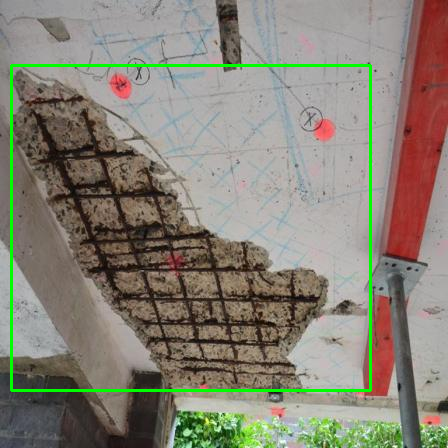

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
from pycocotools import mask as coco_mask
import matplotlib.pyplot as plt

In [ ]:
# Создание маски для отображения
mask = np.zeros_like(image)


# Обернуть в функцию для преобразования массива координат полигона

In [ ]:
array = image_annotations['segmentation'][0][0]
coordinate_array = []
for i in range(0, len(array) - 1, 2):
  coordinate_array.append([array[i], array[i+1]])
polygon_coords = np.array(coordinate_array, np.int32)

In [ ]:
polygon_coords = polygon_coords.reshape((-1, 1, 2))

In [ ]:
# Загрузка изображения
image = np.array(coco_data['image'])
# Convert RGB to BGR
image = image[:, :, ::-1].copy()

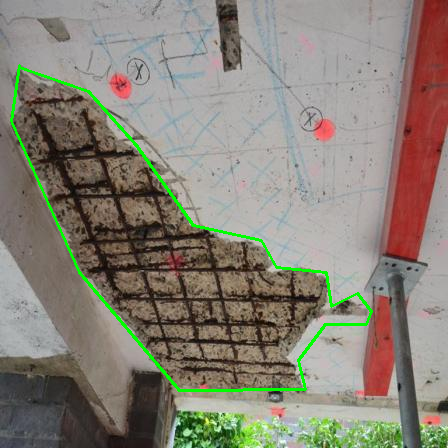

In [ ]:
# Нарисовать полигон на изображении
image = cv2.polylines(image, [polygon_coords], isClosed=True, color=(0, 255, 0), thickness=2)
# Отображение изображения с полигоном
cv2_imshow(image)

# roboflow

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Xzr1zJGyLIIlrEkPj2jz")
project = rf.workspace("palmdetection-1cjxw").project("crack_detection_experiment")
dataset = project.version(5).download("coco-segmentation")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crack_detection_experiment-5 in coco-segmentation:: 100%|██████████| 441/441 [00:00<00:00, 6260.37it/s]


In [ ]:
dataset.model_format

'coco-segmentation'